# **Solución de la ecuación de Loewner**

transforming


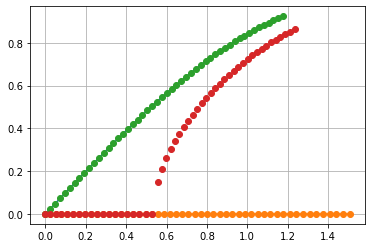

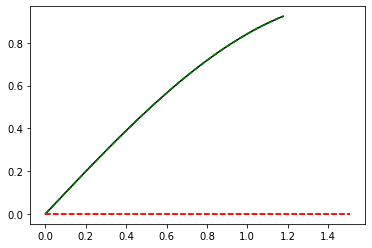

In [1]:
import numpy as np 
from matplotlib import animation
import matplotlib.pyplot as plt
from cmath import sqrt

#Animation function
def animate_vid(p, filename):
    fig, ax = plt.subplots()
    ims = []
    n = len(p[0])
    for j in range(len(p)):
        for i in range(len(t)):
            if j == 1 and i==49:
                1
            else:
                im, = ax.plot(p[j][i].real, p[j][i].imag, "k-")
                ims.append([im])
        ax.plot(p[1][n-2].real, p[1][n-2].imag, "g--")
        ax.plot(p[0][n-1].real, p[0][n-1].imag, "r--")
        ani = animation.ArtistAnimation(fig, ims, interval = 1, blit = True, repeat_delay = 0)
        ani.save(filename)

#transformation function
g = lambda zi, z: zi.real + np.sqrt((z-zi.real)**2 + zi.imag**2)
#function to be used in the initialization of the curve evolution
lin = lambda x: np.sin(x)
#initialization of the curve
def curve_points(fun):
    x = np.linspace(0,1.5*np.pi/4,50)
    y = fun(x)
    z = x + y*1j
    return z

w0 = curve_points(lin)
t = np.zeros(len(w0))
w = np.array(w0)
points = np.zeros([len(w), len(t)], dtype=np.complex_)
print("transforming")
for jj in range(1, len(t)):
    wi = w[jj]
    t[jj]=t[jj-1]+(1/4)*(wi.imag)**2 
    for ii in range(len(w)-jj):
        w[ii+jj] = g(wi, w[ii+jj])
    points[:][jj] = w 
         
            


plt.plot(w0.real, w0.imag, '-')
#plt.plot(w.real, w.imag, '-o')
plt.plot(points[-1].real, points[-1].imag, '-o')
plt.grid()


############# Inverse #############
def f(w1, ud, dt):
    fz = ud + sqrt((w1-ud)**2 - 4*dt)
    return fz


tt = np.array(t)
u = np.array(w)
zz = np.array(u)
point_in = np.zeros([len(zz), len(tt)], dtype=np.complex_) 

for ii in range(len(w)-1):
    for kk in range(ii+1):
        dtt = tt[len(tt)-1-ii]-tt[len(tt)-2-ii]
        zz[len(zz)-1-kk] = f(zz[len(zz)-1-kk], u[len(tt)-ii-1], dtt)
    
    point_in[:][ii]=zz

all_points = [points, point_in]
plt.plot(zz.real, zz.imag, 'o' )
plt.plot(all_points[1][30].real, all_points[1][30].imag, 'o')


animate_vid(all_points, "SLE_evolution.gif")


## **MOVIMIENTO BROWNIANO**

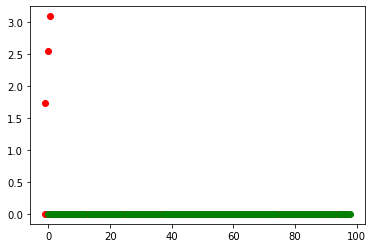

In [2]:
np.random.seed(25)

#Uniform distribution
N = 100
U = np.zeros(N)
for i in range(1, N):
    step = 0
    while step == 0:
        step = np.random.randint(-1,2)
        U[i] = U[i-1] + step

        
point_in = np.zeros(N)
t = np.arange(0, N)
z = np.zeros(N, dtype = np.complex_)
for i in range(N):
    z[i] = i+0*1.j
point_in = np.zeros([len(z), len(t)], dtype=np.complex_) 

for i in range(N-1):
    for k in range(i+1):
        dt = t[len(t)-1-i]-t[len(t)-2-i]
        z[len(z)-1-k] = f(z[len(z)-1-k], U[len(t)-i-1], dt)
    
    point_in[:][i]=z

i =60
plt.plot(z.real, z.imag, 'or' )
plt.plot(point_in[i].real, point_in[i].imag, 'og')

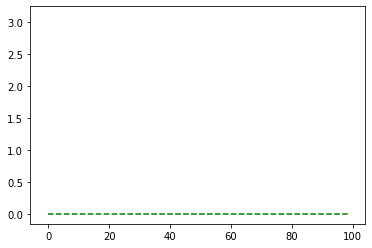

In [3]:
def animate_vid(p, filename):
    fig, ax = plt.subplots()
    ims = []
    for i in range(len(p)):
        if i==0:
            1
        else:
            im, = ax.plot(p[i].real, p[i].imag, "k-")
            ims.append([im])
    ax.plot(p[0].real, p[0].imag, "g--")
    ani = animation.ArtistAnimation(fig, ims, interval = 1, blit = True, repeat_delay = 0)
    ani.save(filename)
    
animate_vid(point_in, "SLE_evolution.gif")
    

### Pruebas código de matlab para crear la curva

Primero pruebo el plot del resultado final

(1999,)


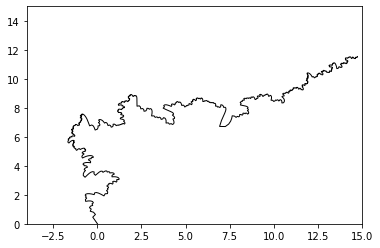

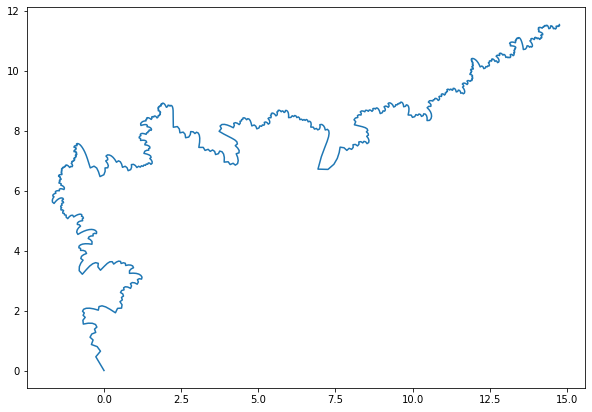

In [6]:
import matplotlib.pyplot as plt
from numpy import sqrt
import numpy as np
from matplotlib.animation import FFMpegWriter, PillowWriter

np.random.seed(102434201)
def fz1(z, kappa):
    a = (1 - sqrt(kappa/(16+kappa)))/2
    return ((z-a)**a)*(z-(a-1))**(1-a)

def fz2(z, kappa):
    a = (1 - sqrt(kappa/(16+kappa)))/2
    return ((z+a)**a)*(z-(1-a))**(1-a)

#SLE parameters
n = 1000 #Total number of points
kappa = 2 #fractal parameter kappa
# kappa=0, vertical slit

# kappa=2,  Loop Erased Random Walk (LERW)

# kappa =8/3, Self-Avoiding Walk



#SLE evolution
f1 = np.zeros(n, dtype = np.complex_) #Initialization of the curve

fig = plt.figure()
plt.xlim(-4, 15)
plt.ylim(0, 15)
l, = plt.plot([], [], 'k-', linewidth=1)
metadata = dict(title='Movie', artist='codinglikemad')
# writer = PillowWriter(fps=15, metadata=metadata)
writer = FFMpegWriter(fps=15, metadata=metadata)
with writer.saving(fig, "1-Creation_curve.gif", 100):
    for h in range(1,n):
        p = np.random.rand(1)
        if p>0.5:
            f1 = np.append([0],fz1(f1,kappa)) #recursive call of the first map if p>0.5
        else:
            f1 =  np.append([0], fz2(f1,kappa)) # else recursive call of the second map 

        x = np.real(f1)
        y = np.imag(f1)
        
        l.set_data(x,y)

        writer.grab_frame()

print(np.shape(f1))

plt.figure(figsize=(10,7))
plt.plot(x, y)
plt.savefig("1-Final_evolution.png")

(199,)


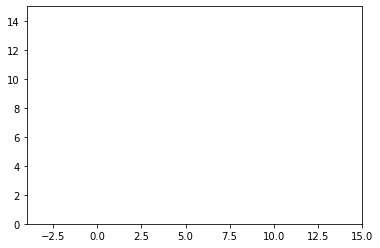

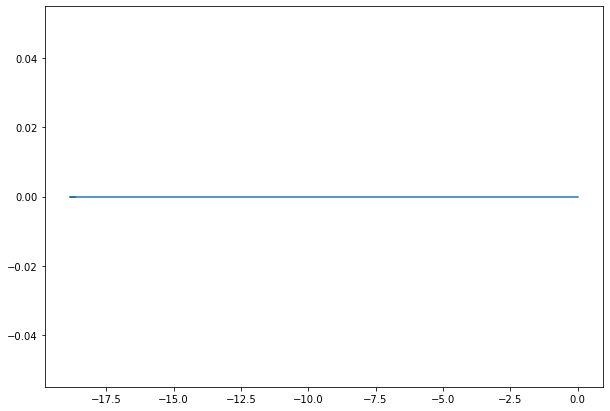

In [3]:
import matplotlib.pyplot as plt
from numpy import sqrt
import numpy as np
from matplotlib.animation import FFMpegWriter, PillowWriter

np.random.seed(1)
def fz1(z, kappa, p, dt):
    chi =  p*np.sqrt(kappa)
    root = 1j*np.sqrt(4*dt-(z-chi)**2)
    for i in range(len(root)):
        if np.imag(root[i]) <0:
            root[i] = np.real(root[i]) + np.imag(root[i])*(-1j)
    return chi+root

#SLE parameters
n = 100 #Total number of points
kappa = 8/3 #fractal parameter kappa
# kappa=0, vertical slit

# kappa=2,  Loop Erased Random Walk (LERW)

# kappa =8/3, Self-Avoiding Walk



#SLE evolution
f1 = np.zeros(n, dtype = np.complex_) #Initialization of the curve

fig = plt.figure()
plt.xlim(-4, 15)
plt.ylim(0, 15)
l, = plt.plot([], [], 'k-', linewidth=1)
metadata = dict(title='Movie', artist='codinglikemad')
# writer = PillowWriter(fps=15, metadata=metadata)
writer = FFMpegWriter(fps=15, metadata=metadata)
with writer.saving(fig, "2-Creation_curve.gif", 100):
    for h in range(1,n):
        dt = h - h-1
        p = np.random.normal(1)
        f1 = np.append([0],fz1(f1,kappa, p, dt)) #recursive call of the first map if p>0.5

        x = np.real(f1)
        y = np.imag(f1)
        
        l.set_data(x,y)

        writer.grab_frame()

print(np.shape(f1))

plt.figure(figsize=(10,7))
plt.plot(x, y)
plt.savefig("2-Final_evolution.png")

<class 'numpy.ndarray'>


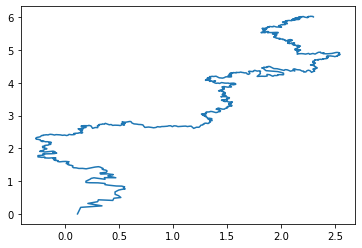

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import numexpr as ne
import copy as cp
from typing import Type, Union 

np.random.seed(14322)
Real = Union[np.float16, np.float32, np.float64, float];
Complex = Union[np.complex64, np.complex128];

def driving_function(size:int, dt:Real, k:Real) -> Type[np.array]:
    u = np.random.standard_normal(size)
    u = np.cumsum(np.sqrt(dt*k)*u) #this cumulative is done to create a gaussian distribution in each step
    return u

def vslit(w:Complex, dt:Real, u:Real) -> Type[Complex]:
    return ne.evaluate("1j * sqrt(4 * dt - (w-u) ** 2) + u")

def SLE(t:Type[np.array], u:Type[np.array]) -> Type[np.array]:

    nsteps = len(t)
    z = np.zeros(len(t), dtype=np.complex_)
    z = cp.deepcopy(u+0.00000001j)
    for step in range(nsteps-1, 0, -1):
        dt = t[step]-t[step-1]
        z[step:] = vslit(z[step:], dt, float(u[step]))

    return z

    
t = np.linspace(0, 10, 1000)
u = driving_function(len(t), t[1]-t[0], 1.81)
print(type(u))
z = SLE(t, u)
#zeros = np.zeros(len(t))

plt.plot(z.real, abs(z.imag), '-')
#plt.grid()
plt.show()